# Hierarchical Density-Based Spatial Clustering of Applications 


https://github.com/scikit-learn-contrib/hdbscan


https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e



In [11]:

import hdbscan
from sklearn.datasets import make_blobs

data, _ = make_blobs(1000)
data

# tfidf vectorizer

array([[-0.55399227, -1.43847936],
       [ 7.17736692,  3.52455995],
       [ 0.38584888, -2.12353114],
       ...,
       [ 6.43625345, -7.75235129],
       [ 6.69975029,  2.77267067],
       [ 0.01643293, -1.11670265]])

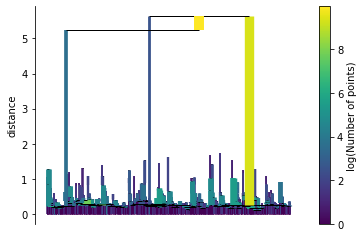

In [10]:
clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(data)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.500, 5)
hierarchy.plot()

In [37]:



# Final Code
#Step 1 vectorize data

import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy          as np
import pandas         as pd
import datetime
import time
import sys
import re
from gensim.parsing.preprocessing import remove_stopwords, split_alphanum, strip_punctuation, strip_short, strip_multiple_whitespaces, strip_non_alphanum, strip_numeric


df= pd.read_csv('trump_joe_biden.csv')
df['text'] = df['text'].fillna('').apply(str)


In [39]:
#preprocessing
def clean(text):
    text = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', text, flags=re.MULTILINE) # urls
    text = re.sub(r'[\s]{0,1}([@#][\w_-]+)', '', text, flags=re.MULTILINE) # @mentions and #hashtags
    text = text.lower() # lowercase all text to use an uncased bert model
    text = text.strip(',.-_ ')
    text = split_alphanum(text.lower())
    text = remove_stopwords(text.lower())
    text = strip_non_alphanum(text.lower())
    text = strip_short(text.lower())
    text = strip_multiple_whitespaces(text.lower())
    text = re.sub('[\d]+', '', text, flags=re.MULTILINE)
    return text


# Change name of text column
df['clean_text'] = df['text'].apply(clean)
# remove empty text data due to the previous cleaning step
df['clean_text'] = df['clean_text'].replace('', np.nan)
df['clean_text'] = df['clean_text'].replace('nan', np.nan)
df = df.dropna(subset=['clean_text'])

print(df)

              published_at    platform  \
0     2020-06-24T23:00:02Z  socialgist   
1     2020-06-24T23:00:05Z  socialgist   
2     2020-06-24T23:00:05Z  socialgist   
3     2020-06-24T23:00:05Z  socialgist   
4     2020-06-24T23:00:08Z  socialgist   
...                    ...         ...   
3616  2020-06-24T23:59:58Z  socialgist   
3617  2020-06-24T23:59:58Z  socialgist   
3618  2020-06-24T23:59:59Z  socialgist   
3619  2020-06-25T00:00:00Z  socialgist   
3620  2020-06-25T00:00:00Z  socialgist   

                                                   text          username  \
0     Give me a thousand law professors and you will...       Sterling363   
1     i think twitter is well within their rights to...  ilikeseashanties   
2                                               "could"        DubiousDoo   
3     Speaking from what I have seen family post. Th...        Austint787   
4     And he still looks like a Nobel Laureate compa...         redrum147   
...                              

In [41]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
# print(vectorizer.get_feature_names())
# print(vectorizer.vocabulary_)

data = X.toarray()

In [43]:
clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
cluster_labels = clusterer.fit_predict(data)
hierarchy = clusterer.cluster_hierarchy_
alt_labels = hierarchy.get_clusters(0.500, 5)


In [48]:
print(alt_labels)

[-1 -1 -1 ... -1 -1 -1]


In [49]:
# A way to return the clusters.
import sys
sys.setrecursionlimit(500)

hierarchy.plot()

RecursionError: maximum recursion depth exceeded in comparison